In [ ]:
import matplotlib.pyplot as plt
import torch
import  torchvision.transforms as transforms
from torch.utils.data import DataLoader

from torchvision.datasets import ImageFolder

import torch.nn as nn
import torch.optim as optim

import time
import numpy as np

import sys
sys.path.append('../src')

from wdwtot.model.cnn import SimpleCNN
# %load_ext autoreload

## Load data

In [ ]:

dataset = ImageFolder(
    root="/Users/toby/Dev/what-do-we-think-of-tottenham/data/processed",
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

# split into test and train
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# # Create a DataLoader for batch processing
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

0

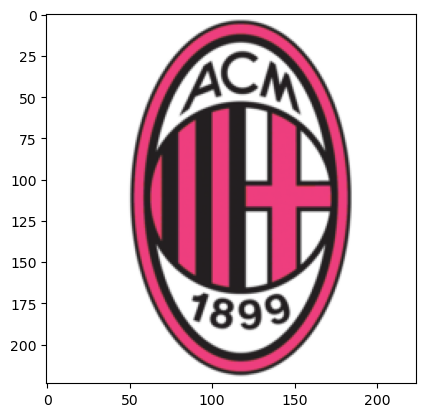

In [19]:
n = 9
plt.imshow(dataset[n][0].permute(1, 2, 0))
dataset[n][1]

# Train the model

In [22]:
model = SimpleCNN()
model

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=100, bias=True)
)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 4


for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    
    start_time = time.time()

    # Training loop
    for inputs, labels in train_dataloader:

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_train_loss = running_loss / len(train_dataloader)

    # Validation loop
    model.eval() 
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradient computation during validation
        for inputs, labels in test_dataloader:

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / len(test_dataloader)
    accuracy = 100 * correct / total

    # Print epoch summary
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Training Loss: {avg_train_loss:.4f}")
    print(f"  Test Loss: {avg_test_loss:.4f}")
    print(f"  Accuracy: {accuracy:.2f}%")
    print(f"  Time for Epoch: {time.time() - start_time:.2f}s")


Epoch [1/4]
  Training Loss: 3.4579
  Test Loss: 1.3645
  Accuracy: 71.67%
  Time for Epoch: 29.42s
Epoch [2/4]
  Training Loss: 0.7274
  Test Loss: 0.7319
  Accuracy: 83.54%
  Time for Epoch: 29.39s
Epoch [3/4]
  Training Loss: 0.1837
  Test Loss: 0.4607
  Accuracy: 89.17%
  Time for Epoch: 29.68s
Epoch [4/4]
  Training Loss: 0.0776
  Test Loss: 0.4322
  Accuracy: 90.83%
  Time for Epoch: 29.48s


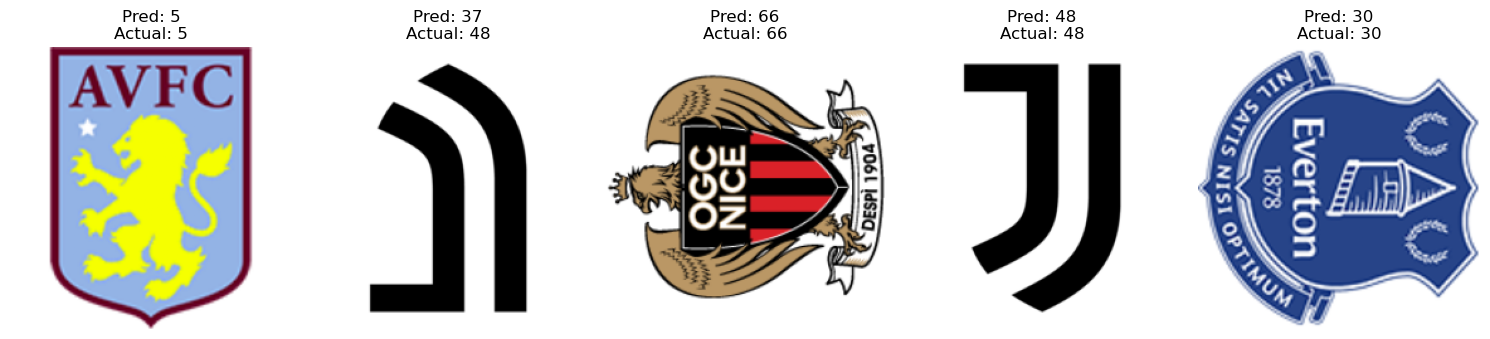

In [33]:
# Set the number of images to display
num_images = 5
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    image, actual_class = test_dataset[i]
    
    # Predict the class
    pred = model(image.unsqueeze(0)).argmax().item()
    
    # Display the image
    axs[i].imshow(image.permute(1, 2, 0))
    axs[i].axis('off')
    axs[i].set_title(f"Pred: {pred}\nActual: {actual_class}")

# Adjust layout and show the grid
plt.tight_layout()
plt.show()